[View in Colaboratory](https://colab.research.google.com/github/baronrogers5/deep-learning/blob/master/mnist_almost_0.99_acc.ipynb)

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


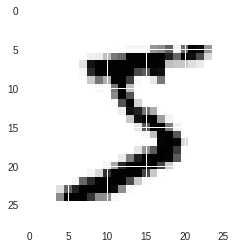

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [13]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 7, 1, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, 1, 7, activation='relu'))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(Convolution2D(16, 3, 1, activation='relu'))
model.add(Convolution2D(16, 1, 3, activation = 'relu'))
model.add(Convolution2D(10,1, activation='relu'))
model.add(Convolution2D(10, 20))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 1), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 7), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 3), activation="relu")`
  if __name__ == '__main__':


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 22, 28, 32)        256       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 22, 22, 64)        14400     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 16)        1040      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 20, 22, 16)        784       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 20, 20, 16)        784       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 20, 10)        170       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 1, 1, 10)          40010     
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10
60000/60000 [==============================] - 32s 526us/step - loss: 0.1588 - acc: 0.9526
Epoch 2/10
31904/60000 [==============>...............] - ETA: 14s - loss: 0.0620 - acc: 0.9808

60000/60000 [==============================] - 30s 500us/step - loss: 0.0582 - acc: 0.9820
Epoch 3/10
50944/60000 [========================>.....] - ETA: 4s - loss: 0.0454 - acc: 0.9859

60000/60000 [==============================] - 30s 507us/step - loss: 0.0443 - acc: 0.9863
Epoch 4/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.0355 - acc: 0.9890

60000/60000 [==============================] - 30s 501us/step - loss: 0.0354 - acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 30s 502us/step - loss: 0.0281 - acc: 0.9910
Epoch 6/10
 2528/60000 [>.............................] - ETA: 29s - loss: 0.0190 - acc: 0.9937

60000/60000 [==============================] - 30s 499us/step - loss: 0.0228 - acc: 0.9926
Epoch 7/10
38624/60000 [==================>...........] - ETA: 10s - loss: 0.0175 - acc: 0.9939

60000/60000 [==============================] - 30s 502us/step - loss: 0.0190 - acc: 0.9936
Epoch 8/10
55168/60000 [==========================>...] - ETA: 2s - loss: 0.0164 - acc: 0.9945

60000/60000 [==============================] - 30s 501us/step - loss: 0.0161 - acc: 0.9945
Epoch 9/10
60000/60000 [==============================] - 30s 500us/step - loss: 0.0140 - acc: 0.9952
Epoch 10/10
 1280/60000 [..............................] - ETA: 30s - loss: 0.0068 - acc: 0.9984

60000/60000 [==============================] - 30s 500us/step - loss: 0.0108 - acc: 0.9964


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [18]:
print(score)

[0.04690836300023693, 0.9881]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[7.04833414e-11 1.42461336e-12 4.23554747e-10 2.17414464e-09
  1.26228249e-15 3.72299023e-12 2.91448965e-22 1.00000000e+00
  1.91164220e-11 1.06344233e-09]
 [2.87794677e-08 2.88418095e-10 1.00000000e+00 2.29438638e-11
  1.23124059e-13 3.87236575e-13 4.31836540e-08 2.59953083e-13
  3.48555673e-09 4.62022659e-14]
 [3.32924488e-09 9.99964595e-01 1.14455140e-07 1.40410927e-09
  2.29422003e-05 5.32734070e-08 4.19927666e-08 1.18491525e-05
  3.19082488e-07 3.52360557e-10]
 [9.99999762e-01 1.24458752e-13 3.19382139e-08 4.42592977e-14
  2.32026273e-11 3.52476465e-10 2.13867636e-07 8.46001991e-10
  3.85826759e-10 1.50868151e-10]
 [1.10406888e-12 2.78747430e-13 5.27078598e-12 5.21652600e-13
  9.99999881e-01 5.49592598e-13 3.53502882e-12 9.10858125e-11
  1.15742338e-11 1.78655128e-07]
 [6.74800793e-09 9.99866247e-01 1.67410192e-07 1.01840814e-09
  1.05039844e-05 9.35097155e-09 1.74297998e-09 1.21652658e-04
  1.46541265e-06 4.86017582e-09]
 [1.95489884e-16 2.47340395e-11 5.15962967e-11 1.27580387e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

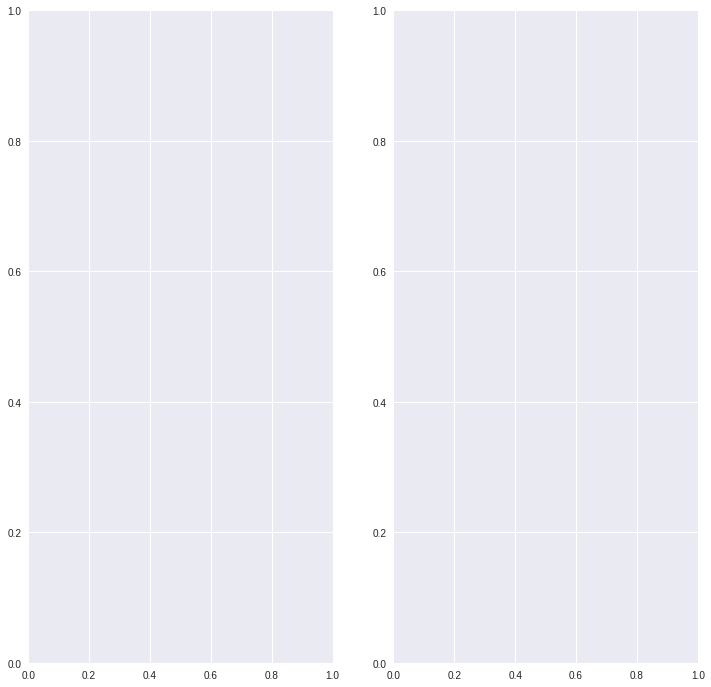

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()